In [25]:
!pip install transformers
!pip install torch


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:

import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import re
from nltk.util import bigrams, trigrams
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from better_profanity import profanity

from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [27]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiyon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiyon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
following = pd.read_csv("../../Dataset/tweets/followings_data.csv")


In [29]:
following

,user,tweets,labels,follows
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1
...,...,...,...,...
4259,user52,And she's pushing for Sharia Law in America. ...,0,following65
4260,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65
4261,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65
4262,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65


In [30]:
following = following.drop_duplicates(subset=['tweets']).reset_index(drop=True)

In [31]:
stopwords_set = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text, ngram=True):
    text = re.sub(r"b['\"]", '', text)
    text = re.sub(r'\bRT\b', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\\\w+', '', text)
    text = re.sub(r'\\x[a-fA-F0-9]{2}', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.split(r'\btruncated\b', text, maxsplit=1)[0]
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()

    tokens = word_tokenize(text)
    if ngram:
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
        text = ' '.join(filtered_tokens)

    return text


In [32]:
following['cleaned'] = following['tweets'].apply(lambda x: clean_text(x))
following['cleaned_transform'] = following['tweets'].apply(lambda x: clean_text(x, ngram=False))

In [33]:
following

,user,tweets,labels,follows,cleaned,cleaned_transform
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,u complete bitch sell part deal dont u underst...,u are a complete bitch an a sell out what part...
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,true barnier eu pushing u deal leaver want eu ...,so it true barnier and eu pushing us to no dea...
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,u never celebrate st george day didnt u cover ...,why do u never celebrate st georges day an why...
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,fuck bit leave dont u understand,fuck off what bit about leave dont u understand
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,left want video muslim peaceful muslimming she...,the left want this video of muslims doing some...
...,...,...,...,...,...,...
3473,user52,And she's pushing for Sharia Law in America. ...,0,following65,shes pushing sharia law america shes dangerous,and shes pushing for sharia law in america she...
3474,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,people cant allow illegals rewrite law sharia ...,we the people cant allow illegals rewrite our ...
3475,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,sharia procedure hand foot chopping tie reduce...,sharias procedure of hand and foot chopping th...
3476,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,sharia law violates billofrights 1440 yr clash...,sharia law violates our billofrights 1440 yr c...


In [34]:
to_drop = following[following['cleaned'] == ""].index
following.drop(to_drop, inplace=True)

In [35]:
following[['tweets', 'cleaned', "labels"]]

,tweets,cleaned,labels
0,"b""@theresa_may U are a complete bitch an a sel...",u complete bitch sell part deal dont u underst...,1
1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",true barnier eu pushing u deal leaver want eu ...,4
2,"b""@theresa_may @10DowningStreet Why do u never...",u never celebrate st george day didnt u cover ...,4
3,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",fuck bit leave dont u understand,1
4,b'RT @RealitySmash: The left want this video o...,left want video muslim peaceful muslimming she...,0
...,...,...,...
3473,And she's pushing for Sharia Law in America. ...,shes pushing sharia law america shes dangerous,0
3474,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,people cant allow illegals rewrite law sharia ...,0
3475,RT @monk_asian: #Sharia's procedure of #hand a...,sharia procedure hand foot chopping tie reduce...,0
3476,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,sharia law violates billofrights 1440 yr clash...,0


In [36]:
def create_ngrams(text, n):
    tokens = word_tokenize(text)
    bigrams = list(ngrams(tokens, n))
    return bigrams

In [37]:
following['bigram'] = following['cleaned'].apply(lambda x: create_ngrams(x, 2))
following['trigram'] = following['cleaned'].apply(lambda x: create_ngrams(x, 3))

In [38]:
def make_ngram_df(column='bigram', k=10):
    rows = []
    for index, row in following.groupby("labels"):
        flattened = row[column].explode().tolist()
        counter = Counter(flattened)
        for ngram, count in counter.most_common(k):
            rows.append({'category': index, column: ngram, 'count': count})

    ngram_df = pd.DataFrame(rows)
    ngram_df[column] = ngram_df[column].apply(lambda x: " ".join(x))
    return ngram_df

In [39]:
def censor_words(text):
    word_censor = {"nigga": "n*gga", "nigger": "n*gger",  "anal": "@n@l", "booty": "b**ty", "pussy": "p*ssy", "sex": "s*x"}
    for word in word_censor:
        text = text.replace(word, word_censor[word])
    return text
    

In [40]:
#bigram df
bigram_df = make_ngram_df('bigram')
bigram_df['censored'] = bigram_df['bigram'].apply(lambda x: censor_words(x))

# trigram df
trigram_df = make_ngram_df('trigram')
trigram_df['censored'] = trigram_df['trigram'].apply(lambda x: censor_words(x))



In [42]:
# top 10 bigrams for each type
bigram_df.to_csv("../../Dataset/tweets/results/twitter_top_bigram_by_category.csv", index=False)
trigram_df.to_csv("../../Dataset/tweets/results/twitter_top_trigram_by_category.csv", index=False)



In [43]:
bigram_df = pd.read_csv("../../Dataset/tweets/results/twitter_top_bigram_by_category.csv")
trigram_df = pd.read_csv("../../Dataset/tweets/results/twitter_top_trigram_by_category.csv")

In [44]:
bigram_df

,category,bigram,count,censored
0,0,sharia law,65,sharia law
1,0,profit muhammad,9,profit muhammad
2,0,muhammad pbuh,8,muhammad pbuh
3,0,left want,6,left want
4,0,sex slave,5,s*x slave
5,0,show islam,4,show islam
6,0,please dont,4,please dont
7,0,dont retweet,4,dont retweet
8,0,year old,4,year old
9,0,tool oppression,4,tool oppression


In [45]:
following

,user,tweets,labels,follows,cleaned,cleaned_transform,bigram,trigram
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,u complete bitch sell part deal dont u underst...,u are a complete bitch an a sell out what part...,"[(u, complete), (complete, bitch), (bitch, sel...","[(u, complete, bitch), (complete, bitch, sell)..."
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,true barnier eu pushing u deal leaver want eu ...,so it true barnier and eu pushing us to no dea...,"[(true, barnier), (barnier, eu), (eu, pushing)...","[(true, barnier, eu), (barnier, eu, pushing), ..."
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,u never celebrate st george day didnt u cover ...,why do u never celebrate st georges day an why...,"[(u, never), (never, celebrate), (celebrate, s...","[(u, never, celebrate), (never, celebrate, st)..."
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,fuck bit leave dont u understand,fuck off what bit about leave dont u understand,"[(fuck, bit), (bit, leave), (leave, dont), (do...","[(fuck, bit, leave), (bit, leave, dont), (leav..."
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,left want video muslim peaceful muslimming she...,the left want this video of muslims doing some...,"[(left, want), (want, video), (video, muslim),...","[(left, want, video), (want, video, muslim), (..."
...,...,...,...,...,...,...,...,...
3473,user52,And she's pushing for Sharia Law in America. ...,0,following65,shes pushing sharia law america shes dangerous,and shes pushing for sharia law in america she...,"[(shes, pushing), (pushing, sharia), (sharia, ...","[(shes, pushing, sharia), (pushing, sharia, la..."
3474,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,people cant allow illegals rewrite law sharia ...,we the people cant allow illegals rewrite our ...,"[(people, cant), (cant, allow), (allow, illega...","[(people, cant, allow), (cant, allow, illegals..."
3475,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,sharia procedure hand foot chopping tie reduce...,sharias procedure of hand and foot chopping th...,"[(sharia, procedure), (procedure, hand), (hand...","[(sharia, procedure, hand), (procedure, hand, ..."
3476,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,sharia law violates billofrights 1440 yr clash...,sharia law violates our billofrights 1440 yr c...,"[(sharia, law), (law, violates), (violates, bi...","[(sharia, law, violates), (law, violates, bill..."


In [46]:
top_10_bigrams = Counter(following['bigram'].explode().tolist()).most_common(10)
top_10_bigram_df = pd.DataFrame(top_10_bigrams, columns=['bigram', 'count'])
top_10_bigram_df['bigram'] = top_10_bigram_df['bigram'].apply(lambda x: " ".join(x))
top_10_bigram_df['censored'] = top_10_bigram_df['bigram'].apply(lambda x: censor_words(x))

In [47]:
top_10_bigrams

[(('sharia', 'law'), 80),
 (('link', 'bio'), 49),
 (('bio', 'anal'), 28),
 (('sadiq', 'khan'), 23),
 (('theresa', 'may'), 23),
 (('year', 'old'), 19),
 (('look', 'like'), 19),
 (('come', 'watch'), 16),
 (('horrible', 'little'), 15),
 (('prime', 'minister'), 14)]

In [48]:
top_10_trigrams = Counter(following['trigram'].explode().tolist()).most_common(10)
top_10_trigram_df = pd.DataFrame(top_10_trigrams, columns=['trigram', 'count'])
top_10_trigram_df['trigram'] = top_10_trigram_df['trigram'].apply(lambda x: " ".join(x))
top_10_trigram_df['censored'] = top_10_trigram_df['trigram'].apply(lambda x: censor_words(x))

In [49]:
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}

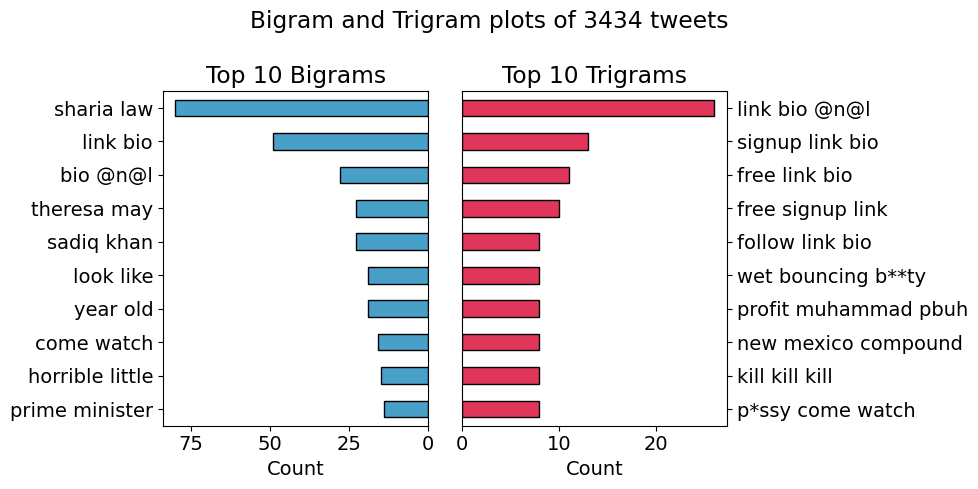

In [50]:
ngram1 = top_10_bigram_df
ngram2 = top_10_trigram_df

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 1],})
fig.suptitle(f"Bigram and Trigram plots of {following.shape[0]} tweets")
# bigram plot
barh_ax1 = ax[0]
ngram1.sort_values('count', ascending=True).plot.barh(
    x='censored', y='count', ax=barh_ax1, color=barcolors[3], legend=False, **barstyle)
barh_ax1.set_title("Top 10 Bigrams")
barh_ax1.set_xlabel("Count")
barh_ax1.invert_xaxis()  

barh_ax1.set_ylabel("")

# trigram plot
barh_ax2 = ax[1]
ngram2.sort_values('count', ascending=True).plot.barh(
    x='censored', y='count', ax=barh_ax2, color=barcolors[6], legend=False, **barstyle)
barh_ax2.set_title("Top 10 Trigrams")
barh_ax2.set_xlabel("Count")

# Move y-axis labels to the right
barh_ax2.yaxis.set_tick_params(left=False, labelleft=False, right=True, labelright=True)
barh_ax2.set_ylabel("")  # No label on the y-axis title

plt.tight_layout()
plt.show()

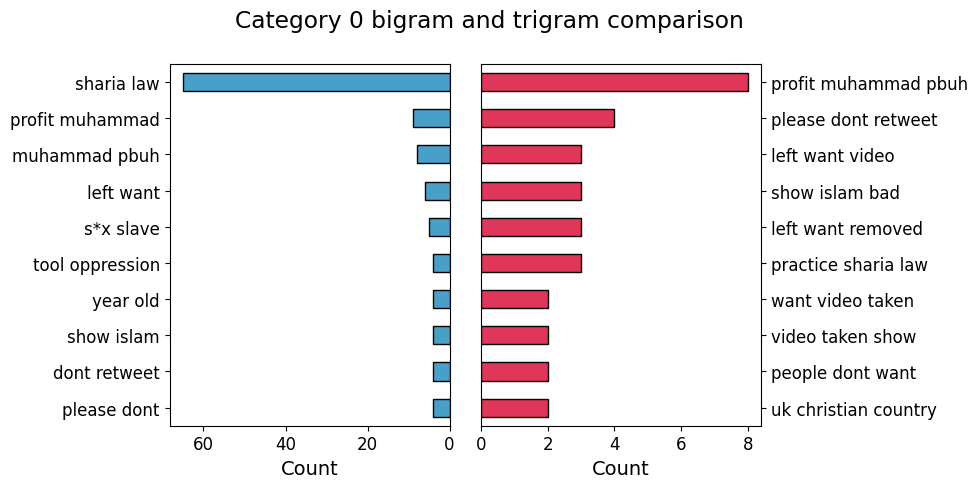

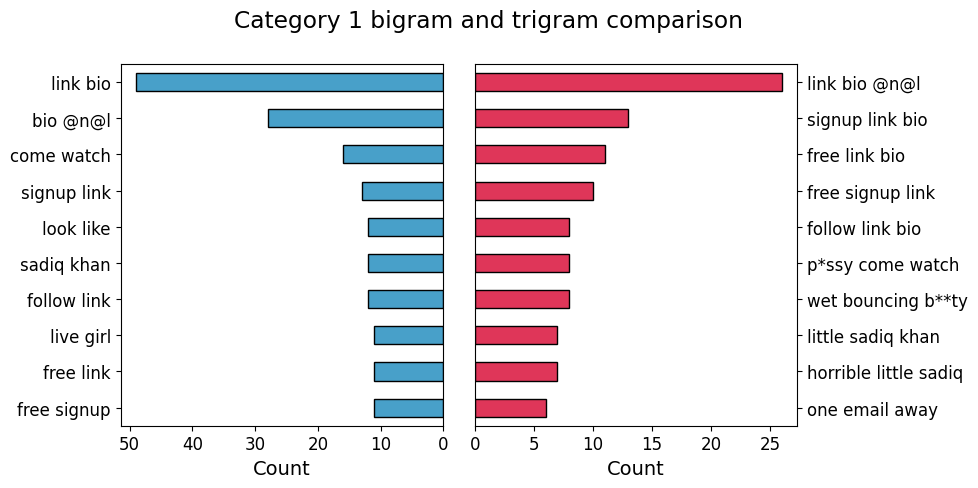

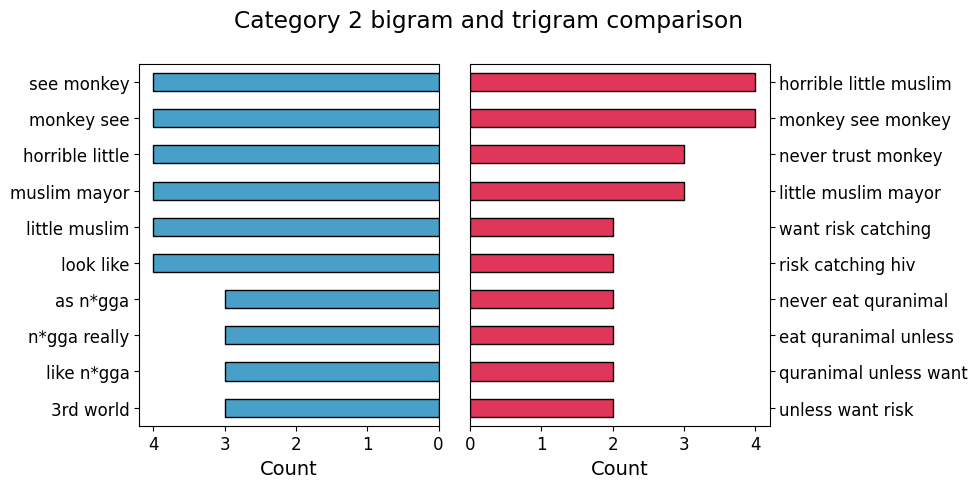

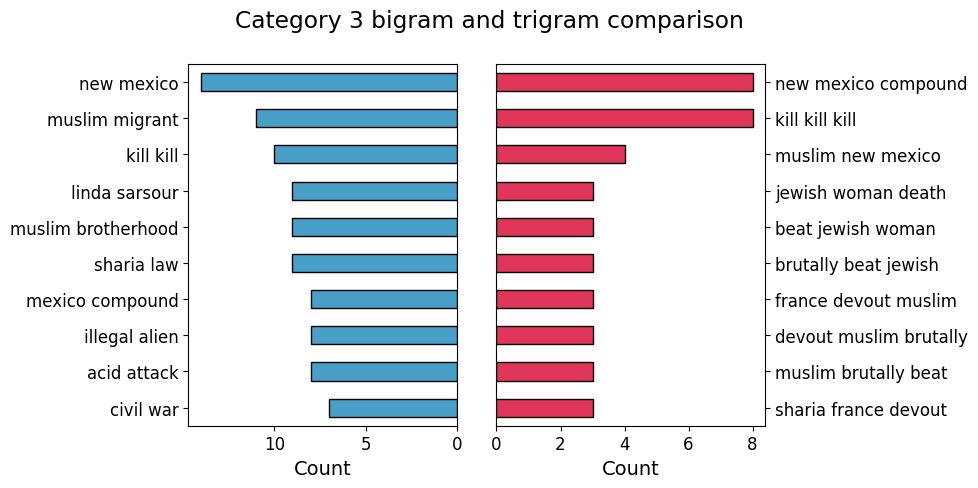

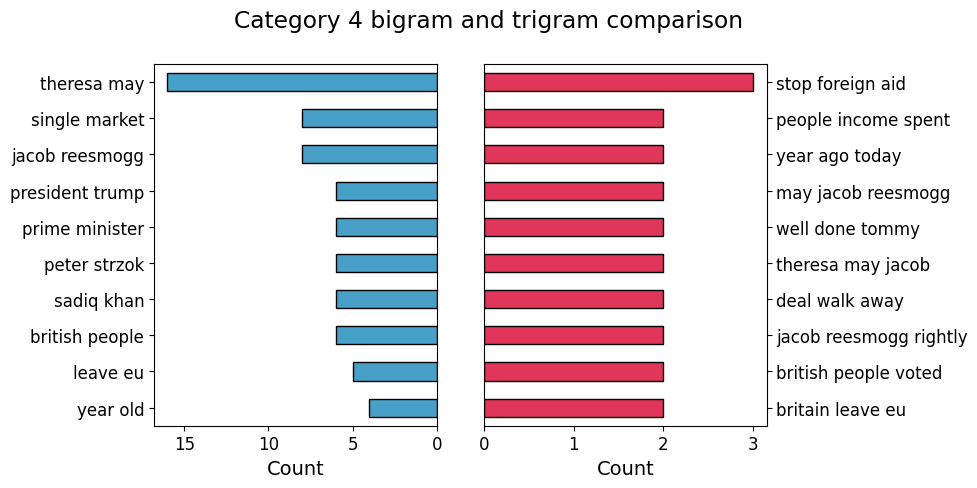

In [51]:
for category, group in bigram_df.groupby("category"):
    # Filter trigram data for the same category
    trigram_group = trigram_df[trigram_df['category'] == category]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 1]})
    fig.suptitle(f"Category {category} bigram and trigram comparison")
    # plot bigram data 
    group.sort_values('count', ascending=True).plot.barh(
        x='censored', y='count', ax=ax[0], color=barcolors[3], legend=False, **barstyle)
    ax[0].set_xlabel("Count")
    ax[0].set_ylabel('',fontsize=25)
    ax[0].invert_xaxis()  
    ax[0].tick_params(axis='both', labelsize=12)

    # plot trigram data
    trigram_group.sort_values('count', ascending=True).plot.barh(
        x='censored', y='count', ax=ax[1], color=barcolors[6], legend=False, **barstyle)
    ax[1].set_xlabel("Count")
    ax[1].set_ylabel('',fontsize=25)
    ax[1].yaxis.set_tick_params(left=False, labelleft=False, right=True, labelright=True)
    ax[1].tick_params(axis='both', labelsize=12)

    
    plt.tight_layout()
    plt.show()


In [52]:
following

,user,tweets,labels,follows,cleaned,cleaned_transform,bigram,trigram
0,user1,"b""@theresa_may U are a complete bitch an a sel...",1,following1,u complete bitch sell part deal dont u underst...,u are a complete bitch an a sell out what part...,"[(u, complete), (complete, bitch), (bitch, sel...","[(u, complete, bitch), (complete, bitch, sell)..."
1,user1,"b'RT @NadineDorries: So, it\xe2\x80\x99s true....",4,following1,true barnier eu pushing u deal leaver want eu ...,so it true barnier and eu pushing us to no dea...,"[(true, barnier), (barnier, eu), (eu, pushing)...","[(true, barnier, eu), (barnier, eu, pushing), ..."
2,user1,"b""@theresa_may @10DowningStreet Why do u never...",4,following1,u never celebrate st george day didnt u cover ...,why do u never celebrate st georges day an why...,"[(u, never), (never, celebrate), (celebrate, s...","[(u, never, celebrate), (never, celebrate, st)..."
3,user1,"b""@Anna_Soubry @theresa_may @sarahwollaston @B...",1,following1,fuck bit leave dont u understand,fuck off what bit about leave dont u understand,"[(fuck, bit), (bit, leave), (leave, dont), (do...","[(fuck, bit, leave), (bit, leave, dont), (leav..."
4,user1,b'RT @RealitySmash: The left want this video o...,0,following1,left want video muslim peaceful muslimming she...,the left want this video of muslims doing some...,"[(left, want), (want, video), (video, muslim),...","[(left, want, video), (want, video, muslim), (..."
...,...,...,...,...,...,...,...,...
3473,user52,And she's pushing for Sharia Law in America. ...,0,following65,shes pushing sharia law america shes dangerous,and shes pushing for sharia law in america she...,"[(shes, pushing), (pushing, sharia), (sharia, ...","[(shes, pushing, sharia), (pushing, sharia, la..."
3474,user52,RT @RGodGivenRights: @Lrihendry @PinkBelgium @...,0,following65,people cant allow illegals rewrite law sharia ...,we the people cant allow illegals rewrite our ...,"[(people, cant), (cant, allow), (allow, illega...","[(people, cant, allow), (cant, allow, illegals..."
3475,user52,RT @monk_asian: #Sharia's procedure of #hand a...,0,following65,sharia procedure hand foot chopping tie reduce...,sharias procedure of hand and foot chopping th...,"[(sharia, procedure), (procedure, hand), (hand...","[(sharia, procedure, hand), (procedure, hand, ..."
3476,user52,RT @LanceSilver1: #Sharia Law VIOLATES Our #Bi...,0,following65,sharia law violates billofrights 1440 yr clash...,sharia law violates our billofrights 1440 yr c...,"[(sharia, law), (law, violates), (violates, bi...","[(sharia, law, violates), (law, violates, bill..."


In [ ]:
following.to_csv("../../Dataset/tweets/twitter_processed.csv", index=False)